# Intro

**Este é nosso ambiente de programação!**

Aqui, como em qualquer IDE (integrated development environment) Jupyter, podemos inserir textos (em formato de Markdown), imagens, nosso código em Python, e até comandos linux !!!!

Para adicionar uma célula textual você só precisa clicar no **+Text** no topo de nosso Notebook. Dentro dessa célula você pode adicionar comando de [**Markdown**](https://blog.da2k.com.br/2015/02/08/aprenda-markdown/) e [**Latex**](http://each.uspnet.usp.br/sarajane/wp-content/uploads/2016/10/manual-latex-1.pdf). Também é possível inserir imagens para deixar seu Notebook mais ilustrativo. Como por exemplo: 

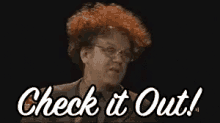

Para usar um comando linux em nosso Notebook é simples:


1.   Adicione uma célula de código (fica ao lado do **+Text** no topo)
2.   Coloque um **`!`** na frente para poder direcionar o comando.

Ex:



In [ ]:
!pwd

/content


Os comandos Python são diretos. Portanto, é só abrir uma célular de código e ser feliz!

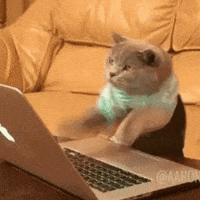

Ex:

In [ ]:
print("Hello World!")

Hello World!


Agora vamos olha a junção de nosso ambiente de desenvolvimento **Jupyter** com a infraestrutura que o **Google Colab** nos fornece!

De cara podemos ver que temos livres 12.72 Gb de RAM e aproximadamente 108 Gb de espaço de disco, sendo apenas 78 Gb aproximadamente livres. Podemos verificar isso no canto direito superior do nosso Notebook.

Ainda não conseguimos ver as informações de GPU e nem TPU (chips para operações em tensores exclusivos do Google). Para isso, devemos usar o comando linux da **Nvidia** para verificarmos as configurações de GPU que temos diposníveis. A TPU será sempre um chipset de 8 cores.

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

/bin/sh: 1: nvidia-smi: not found


Apesar de estarmos usando o nosso Notebook através do **Google Drive**, não consiguimos visualizar nossos diretórios e arquivos ainda. Isto acontece pois ao rodar o **Colaboratory** ele é montado automaticamente numa pasta na raiz de nosso **Google Drive**. Todavia, não é o que desejamos, então vamos montar nosso disco com os diretórios de nosso **Google Drive**. Temos duas formas de fazer:


1.   Usando a interface (indo no ícone de folder no canto esquerdo e depois clicando no ícone de folder com o símbolo do **Google Drive**) (**Atenção!!!** Será necessário fornecer as credenciais de sua conta)
2.   Montar nosso disco usando o próprio comando **Python**. Vejamos abaixo o procedimento:



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Pronto!!! Agora temos acesso aos diretórios de nosso **Google Drive** e ao conteúdo de nosso **Mini-Curso**. Vamos ver?

In [ ]:
!ls '/content/gdrive/My Drive/'

 handsonuff  'Other Content'


Agora que nossa introdução passou, podemos começar nosso projeto!!

# Ao Trabalho

## Importando as Bibliotecas Iniciais

Temos que começar importando as bibliotecas que iremos usar para trabalhar inicialmente. 

In [ ]:
import numpy as np
import pandas as pd

Para maiores informações sobre essas bibliotecas, pode ser utilizado a documentação online das mesmas.

1.   [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
2.   [Numpy](https://numpy.org/doc/)



## Importando o nosso dataset

Por ser um dataset de treinamento e fornecido por um desafio Kaggle, nossos dados já estão divididos em dados de treino e teste. O guia para essa subdivisão foram as entradas que já obtinham valores para a nossa variável alvo, `SalePrice`, estão alocadas no dataset de treino e as que não obtinham esses valores, que deveremos predizer, estão alocadas no dataset de teste.

In [ ]:
treino = pd.read_csv('/content/gdrive/My Drive/handsonuff/dia1/data/train.csv')
teste = pd.read_csv('/content/gdrive/My Drive/handsonuff/dia1/data/test.csv')

Vamos dar uma olhada no nosso dataset de treino

In [ ]:
# A função .head() mostra as primeiras linhas do dataset

treino.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Affordable
0,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,...,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,0
1,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,...,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,0
2,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,...,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000,0
3,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,...,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657,0
4,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,...,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933,0


De cara já vemos que temos variáveis com dados faltantes, variáveis categóricas, em sua maioria não ordinais, e, várias variáveis numéricas. Todavia, se olharmos atentamente, não estamos vendo todas as variáveis disponíveis em nosso dataset. Isso ocorre pois a configuração padrão da biblioteca **Pandas** limita quantas colunas podemos ver em nosso dataset. Podemos alterar essa configuração rapidamente para que possamos averiguar todas as variáveis disponíveis.

In [ ]:
pd.set_option('max_columns', None)

Agora podemos dar uma olhada de novo no nosso dataset de treino.

In [ ]:
treino.head(n=3) # podemos configurar a quantidade de linhas que gostaríamos de ver usando o parâmetro n 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Affordable
0,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,0
1,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,0
2,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000,0


Podemos ver "tudo" de nosso dataset!! Mas, é muita coisa pra se associar... Como fazemos para olharmos rapidamente quantas entradas e variáveis temos?

In [ ]:
print('Quantidade de Entradas: ', len(treino), '\n', 'Quantidade de Variáveis: ', len(treino.columns))

Quantidade de Entradas:  1460 
 Quantidade de Variáveis:  82


## EDA

Agora que demos uma pequena olhada em nosso dataset, vamos começar nossa exploração! Uma das partes mais importantes de um pipeline de Data Science! A **Análise Exploratória dos Dados**, também chamado de ***EDA - Exploratory Data Analysis***.



Primeiramente, vamos olhar uma descrição geral de nossas variáveis.

In [ ]:
treino.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Affordable
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.542466
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.498364
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


Nesta tabela que começamos realmente a trabalhar. Basicamente nós temos que nos atentar a 3 fatores aqui:



1.   Valores de **Mínimo** e **Máximo**: Esses dois valores podem nos dar uma ideia sobre a faixa de valores e é útil para detectar **outliers**. Em nosso caso, a maioria dos valores, *a priori*, parecem razoáveis.

2.   Valores de **Média** e **Desvio Padrão**: A média nos mostra a tendência central da distribuição, enquanto o desvio padrão quantifica sua quantidade de variação. Por exemplo, um baixo desvio padrão sugere que os pontos de dados tendem a estar próximos da média. Dando uma olhada rápida em nossos valores, não há nada que pareça obviamente errado.

3. A **Quantidade** de amostras: Este valor é importante pois nos dá uma primeira impressão sobre os dados faltantes. Por exemplo, podemos ver que a variável `LotFrontage` tem uma quantidade razoável de entradas faltantes. 






Vamos dar uma olhada mais a fundo nas variáveis com dados faltantes. Aquelas que tiverem um valor muito alto, não poderemos prever ou até retirar de nossos registros. Dessa forma, nesta etapa, podemos acabar removendo alguma variáveis.

In [ ]:
perc_null_data = ((treino.isnull().sum() / len(treino)) * 100).sort_values(ascending=False) # calculando a porcentagem

df_null_data = pd.DataFrame({'Porcentagem de dados faltantes' :perc_null_data}) # guardando em um dataframe (tabela pandas)

df_null_data.head(20) # plotando para averiguar o resultado

,Porcentagem de dados faltantes
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageCond,5.547945
GarageFinish,5.547945
GarageType,5.547945


Podemos ver que algumas variáveis possuem um alto valor de dados faltantes, impedindo que usemos qualquer tipo de predição desses valores. Sendo assim, temos que retirar essas variáveis de nosso dataset, já que não serão usadas.

In [ ]:
lista_drop = df_null_data.nlargest(6, 'Porcentagem de dados faltantes').index.tolist() # criando a lista de variáveis que não iremos usar

treino.drop(columns=lista_drop, inplace=True) # removendo as colunas selecionadas

treino.shape # verificando se o processo fora bem sucedido

(1460, 76)

Agora nós temos algumas opções:



1.   Podemos tentar predizer esses valores faltantes:

> Usando informações adicionais

> Usando inferências estatísticas: Moda, Média, Mediana

> Usando modelos de ML para predizermos

2.   Podemos simplesmente descartá-los, caso não façam tanta falta.




In [ ]:
lista_null = df_null_data[(df_null_data['Porcentagem de dados faltantes'] > 0) & (df_null_data['Porcentagem de dados faltantes'] < 17) ].index.tolist()
# criando a lista de variáveis que iremos remover os dados faltantes

lista_null

['GarageQual',
 'GarageCond',
 'GarageFinish',
 'GarageType',
 'GarageYrBlt',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

As variáveis **GarageType**, **GarageFinish**, **GarageQual**, e **GarageCond** : Podemos substituir os valores faltantes pelo indicativo de que na verdade a casa não teria uma garagem, ou seja, **"None"**.

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'): # iterando apenas sobre estas variáveis
    treino[col] = treino[col].fillna('None') # preenchendo os dados nulos

As variáveis **GarageYrBlt**, **GarageArea**, e **GarageCars** : Podemos substituir os valores faltantes por 0, já que a casa não possui garagem, então a mesma não terá espaço para carro ou área de garagem.

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'): # iterando apenas sobre estas variáveis
    treino[col] = treino[col].fillna(0) # preenchendo os dados nulos

As variáveis **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, e **BsmtHalfBath** : Podemos substituir os valores nulos por zero, já que é provável que os mesmos sejam indicativos de que não haja porão na casa.

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): # iterando apenas sobre estas variáveis
    treino[col] = treino[col].fillna(0) # preenchendo os dados nulos

As variáveis **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, e **BsmtFinType2** : Podemos substituir os valores faltantes dessas variáveis categóricas também por "None", pois os mesmos podem ser associados a não existência de um porão.

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'): # iterando apenas sobre estas variáveis
    treino[col] = treino[col].fillna('None') # preenchendo os dados nulos

As variáveis **MasVnrArea** e **MasVnrType** : Podemos substituir os valores faltantes por 0, já que os mesmos podem ser associados a não existência de alvenaria na residência. 

In [ ]:
treino["MasVnrType"] = treino["MasVnrType"].fillna("None") # preenchendo os dados nulos
treino["MasVnrArea"] = treino["MasVnrArea"].fillna(0) # preenchendo os dados nulos

Por fim, a variável **Electrical** podemos usar uma abordagem diferente das que usamos acima. Como só temos uma entrada nula pra esse valor e sendo esta variável categórica, podemos usar o valor mais comum, ou seja, a moda.

In [ ]:
treino['Electrical'] = treino['Electrical'].fillna(treino['Electrical'].mode()[0]) # preenchendo o dado nulo

Agora vamos checar se nossas operações fora bem sucedidas

In [ ]:
treino.isnull().sum().max() # vamos pedir agora o máximo de valores nulos possível em todo nosso dataset

0

Vamos observar agora o comportamento de algumas variáveis como exemplo. Para isso, precisaremos de algumas bibliotecas de visualização e algumas bibliotecas para checarmos algumas estatísticas. Vamos importá-las?

In [ ]:
import matplotlib.pyplot as plt  # biblioteca de visualização ao estilo Matlab
import seaborn as sns # biblioteca de visualização mais fancy

color = sns.color_palette() # firulagem a mais
sns.set_style('darkgrid') # firulagem a mais

from scipy.stats import norm, skew # para checarmos a distribuição normal de uma variável e seu possível enviesamento


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Agora, vamos visualizar como algumas variáveis se comportam e se correlacionam com nossa variável alvo `SalePrice`.

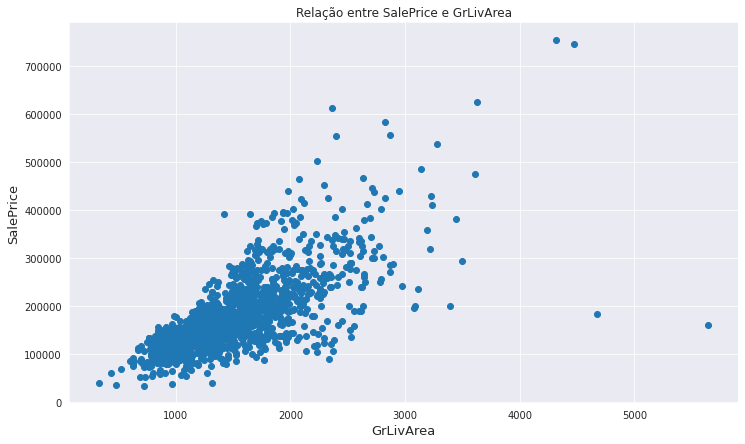

In [ ]:
plt.figure(figsize=(12,7)) # alterando o tamanho original de nosso gráfico
plt.scatter(x=treino['GrLivArea'], y=treino['SalePrice']) # gerando um scatter plot
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Relação entre SalePrice e GrLivArea')
plt.show()

Podemos ver que as variáveis `SalePrice` e `GrLivArea` tem uma correlação linear. Muito provavelmente ela terá destaque na hora de selecionarmos as melhores variáveis para usarmos em nosso modelo.

Vamos dar uma olhada em como nossa variável se relaciona com uma variável categórica. 

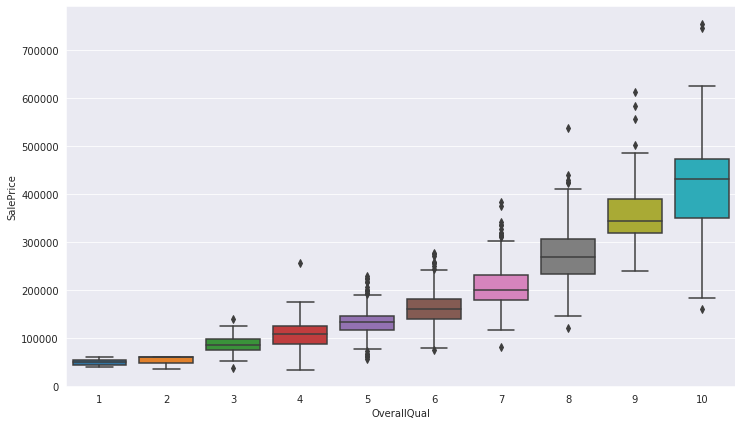

In [ ]:
var = 'OverallQual' # selecionando a nossa variável
data = pd.concat([treino['SalePrice'], treino[var]], axis=1) # criando o dataset para visualizar
plt.figure(figsize=(12,7)) # alterando o tamanho original de nosso gráfico
sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);

Aqui podemos ver que podemos ter alguns outliers presentes. Todavia, queremos entender melhor o dataset e até usar algoritmos que sejam mais robustos e comportem esses outliers.

Para entender melhor como funcionam [box-plots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51), podemos usar o link de referência ou a imagem abaixo:

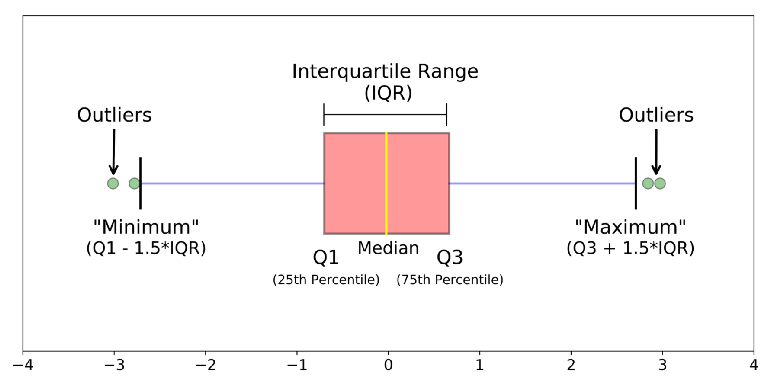

Vamos olhar agora nossa variável alvo (**SalePrice**)!

Média:  180921.19589041095 
 Desvio Padrão:  79415.2918860675 
 Grau de Enviesamento:  1.8828757597682133


Text(0.5, 1.0, 'Distribuição da variável alvo')

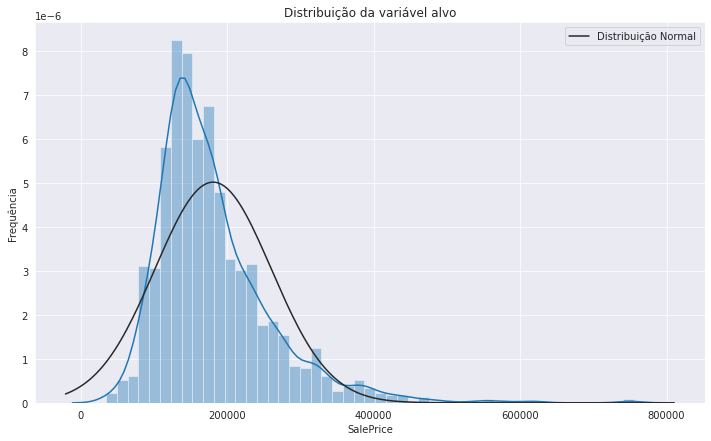

In [ ]:
plt.figure(figsize=(12,7)) # alterando o tamanho original de nosso gráfico
sns.distplot(treino['SalePrice'] , fit=norm); # checando a histograma e mostrar a curva normal de nossa variável. Usamos o ';' após a chamada para suprimir saídas textuais desncessárias
(mu, sigma) = norm.fit(treino['SalePrice']) # calculando a média e o desvio padrão
skew_result = treino['SalePrice'].skew() # calculando o grau de enviesamento
print( 'Média: ', mu, '\n', 'Desvio Padrão: ', sigma, '\n', 'Grau de Enviesamento: ', skew_result)
plt.legend(['Distribuição Normal']) # dando nome aos bois (nossas curvas)
plt.ylabel('Frequência') # nomeando o eixo Y
plt.title('Distribuição da variável alvo') # dando título ao nosso gráfico


De cara já podemos ver que nossa variável alvo não está muito próxima de uma distribuição normal. O grau de enviesamento já mostra um peso maior para a parte mais a esquerda da distribuição, também comprovada pelo histograma. É de suma importância deixarmos não só nossa variável alvo, mas nossas variáveis de entrada, mais próximos de uma distribuição normal, pois os modelos disponíveis tem sua convergência e acurácia afetada por dados enviesados. 

Podemos fazer a transformação de nossa variável alvo de diferentes formas:

1.   Aplicando **transformações matemáticas** visando a distribuição normal dos dados. Por exemplo uma transformação em log ou exponencial.
2.   Podemos usar bibliotecas já prontas com diversos tipos de transformações. Um bom exemplo deste caso é a biblioteca [Sklearn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

Uma transformação simples que podemos fazer, especificamente para casos onde o enviesamento da distribuição é positiva, ou seja, a "calda" mais a esquerda de nossso histograma tem mais peso que sua contra parte, seria a transformação em `log`. Todavia, devemos lembrar que `log` de `0` não possui valor definido. Por sorte, o **Numpy** já possui uma função pronta para contornar estes casos.



In [ ]:
treino['SalePrice'] = np.log1p(treino['SalePrice']) # O legal dessa função é que ao invés de operar como log(x) ela opera como log(1+x), evitando assim que gerássemos NaNs na nossa transformação

Vamos verificar se essa transformação matemática foi satisfatória.

Média:  12.024057394918403 
 Desvio Padrão:  0.39931245219387496 
 Grau de Enviesamento:  0.12134661989688016


Text(0.5, 1.0, 'Distribuição da variável alvo')

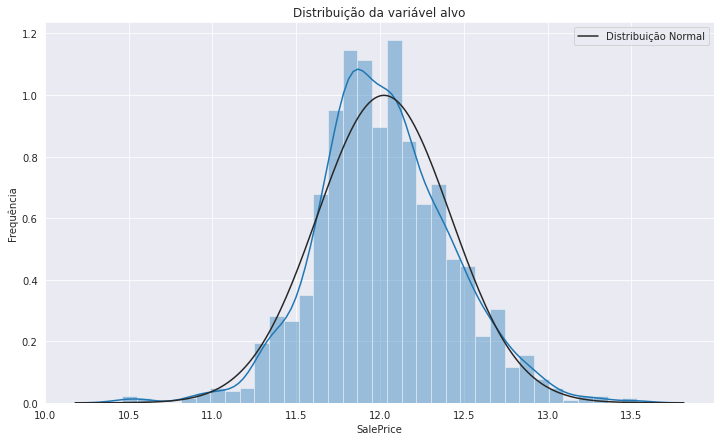

In [ ]:
plt.figure(figsize=(12,7)) # alterando o tamanho original de nosso gráfico
sns.distplot(treino['SalePrice'] , fit=norm); # checando a histograma e mostrar a curva normal de nossa variável. Usamos o ';' após a chamada para suprimir saídas textuais desncessárias
(mu2, sigma2) = norm.fit(treino['SalePrice']) # calculando a média e o desvio padrão
skew_result2 = treino['SalePrice'].skew() # calculando o grau de enviesamento
print( 'Média: ', mu2, '\n', 'Desvio Padrão: ', sigma2, '\n', 'Grau de Enviesamento: ', skew_result2)
plt.legend(['Distribuição Normal']) # dando nome aos bois (nossas curvas)
plt.ylabel('Frequência') # nomeando o eixo Y
plt.title('Distribuição da variável alvo') # dando título ao nosso gráfico


Perfeito! Conseguimos reduzir o enviesamento para bem próximo de zero e nossa distribuição agora está bem próxima da normal!

Vamos olhar o resto do nosso dataset?

In [ ]:
var_numericas = treino.dtypes[treino.dtypes != 'object'].index # vamos selecionar apenas as variáveis numéricas de nosso dataset de treino

var_envi = treino[var_numericas].apply(lambda x: skew(x)).sort_values(ascending=False) # vamos aplicar a função para calcular o enviesamento

envi_datframe = pd.DataFrame({'Enviesamento': var_envi}) # transformando nosso resultado em um dataframe e nomeando a coluna

envi_datframe.head(15)

,Enviesamento
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


Parece que temos trabalho a fazer. Vamos delimitar uma tolerância para nossa métrica de enviesamento de `0.70` para selecionar apenas as variáveis que estão acima desse limitador. Selecionadas, vamos aplicar mais uma vez uma transformada matemática para normalizá-las.

In [ ]:
envi_datframe_reduzido = envi_datframe[abs(envi_datframe) > 0.70] # selecionando as variáveis que estão acima de nossa tolerância

print('Número de Variáveis Enviesadas acima do limite estabelecido: ', len(envi_datframe_reduzido)) # printando a quantidade de variáveis que estão com enviesamento acima do estabelecido

Número de Variáveis Enviesadas acima do limite estabelecido:  38


Bom, sabemos que temos 38 variáveis acima de nossa tolerância estabelecida. Vamos tentar corrigí-las usando o mesmo método que usamos acima, usando a transformação logarítimica.



In [ ]:
var_envi2 = envi_datframe_reduzido.index # coletando as colunas que estão acima da nossa tolerância

for col in var_envi2: # iterando sobre essas colunas
    treino[col] = np.log1p(treino[col]) # aplicando a transformação logarítimica

Vamos olhar agora as variáveis categóricas? Se olharmos ao nosso dataset, temos algumas variáveis que estão em formato de `string`, ou seja, não são reconhecidas como números, mas sim como palavras, letras, ou símbolos. Dessa forma, temos que converter essas variáveis em números representativos da informação que está presente em cada uma delas.

Primeiramente, vamos olhar as variáveis categóricas ordinais, que possuem uma ordem implícita em seus valores. A biblioteca **Sklearn** tem uma função bem interessante para usarmos nesse caso, o [**LabelEnconder**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Essa biblioteca converte os valores categoricos ordinais em numerais ordinais, preservando assim a ordem existente na nossa variável. 

In [ ]:
var_cat_ord = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
# nossa lista de variáveis categóricas ordinais

from sklearn.preprocessing import LabelEncoder # importando nossa biblioteca de transformação.

for col in var_cat_ord: # iterando sobre as variáveis categóricas ordinais
  if col in treino.columns: # vamos verificar se todas as colunas realmente ainda existem pois nós removemos algumas em processos anteriores
    treino[col] = LabelEncoder().fit_transform(treino[col]) # aplicando a transformação

Agora vamos cuidar das variáveis categóricas não ordinais. O próprio **Pandas** tem uma função que trata essas variáveis para nós o `get_dummies`. 

In [ ]:
treino_final = pd.get_dummies(treino) # aplicando a função get_dummies e guardando em um outro dataframe para podermos fazer a comparação de tamanho mais a frente

Vamos comparar a quantidade de variáveis que o nosso dataset de treino tinha antes e depois da transformação usando `get_dummies` para podermos entender como essa função opera. 

In [ ]:
print('Tamanho do nosso dataset de Treino antes da função: ', treino.shape, '\n', 'Tamanho do nosso dataset de Treino depois da função: ', treino_final.shape)

Tamanho do nosso dataset de Treino antes da função:  (1460, 76) 
 Tamanho do nosso dataset de Treino depois da função:  (1460, 215)


Uau!!! Nós praticamente triplicamos a nossa quantidade de variáveis. Isso acontece porque o `get_dummies` transforma cada entrada única de nossas variáveis categóricas e transforma em uma variável binária. No nosso caso, como só restaram as variáveis categóricas não ordinais, elas foram as únicas a não serem utilizadas.

## Selecionando as variáveis (Regressão) 

Essa parte do nosso fluxograma é fundamental. Aqui, nós temos que **decidir** quais variáveis realmente iremos usar no nosso modelo de regressão e quais iremos deixar de lado. Isso impacta diretamente no nosso **custo computacional**, pois quanto mais dados colocarmos para serem analisados pelos nosso modelo, mais custoso será e mais tempo demorará. Além disso, podemos **rankear** as nossas variáveis em quais serão mais úteis ou não para nosso modelo.

Basicamente existem 3 tipos de metodologias para seleção de variáveis:

1.   **Filtragem**: Como o próprio nome já diz, esse método consiste em filtrar nossas variáveis para um sub-conjunto de variáveis relevantes. A filtragem é, na maioria das vezes, usando uma matriz de correlação. Comumemnt é usada a correlação de Pearson para a confecção dessa matriz.
2.   **"Empacotar" *(Wrapper Method)***:  O método de "empacotar", corretamente chamado de  *Wrapper Method*, utiliza o **algoritmo de ML** selecionado para a tarefa e avaliar quais variáveis produzem as melhores métricas. É um tipo de método de força-bruta e o mais famoso é o ***Recursive Feature Elimination*** **(RFE)**. Esse método é muito mais custoso e iterativo que o método de Filtragem, todavia, este produz resultados mais acurados e detalhados.
3. **"Embutir" *(Embedded Method)***:  O método de "embutir", corretamente chamado de **Embedded Method**, é extremamente iterativo. Cada iteração do processo de treinamento do modelo é analisada cuidadosamente, sendo guardado  as variáveis que mais contribuiram para a cada dada iteração. Os métodos de regularização são os mais comuns nesses casos, pois os mesmos penalizam as variáveis dado um determinado limitante.

Por questões práticas e para preservar o tempo e custo computacional de nossos curso, iremos aplicar o método de filtragem. 



Primeiramente vamos calcular nossa matriz de correlação. Como temos uma quantidade imensa de variáveis não iremos visualizar diretamente essa matriz pois ela geraria uma imagem muito grande e difícil de analizar. Sendo assim, vamos filtrar essa matriz selecionando um número menor de variáveis que estão mais correlacionadas com a nossa variável alvo `SalePrice`.

In [ ]:
corrmat_total = (treino_final.corr()) # coeficientes de correlação absolutos

pf = 31 # vamos selecionar primeiramente as 30 variáveis mais bem correlacionadas com nosso alvo (primeira filtragem)

cols_pf = corrmat_total.nlargest(pf, 'SalePrice').index.tolist() # fazendo a seleção

treino_pf = treino_final[cols_pf] # reduzindo nosso dataset de treino

Conferindo o procedimento e quais variáveis foram selecionadas

In [ ]:
print(treino_pf.shape, cols_pf)

(1460, 31) ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'GarageType_Attchd', 'MasVnrArea', 'LotArea', 'TotalBsmtSF', 'CentralAir', 'Neighborhood_NridgHt', 'WoodDeckSF', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'GarageYrBlt', 'GarageCond', 'SaleType_New', 'HalfBath', 'SaleCondition_Partial', 'Electrical_SBrkr', 'PavedDrive', 'MasVnrType_Stone', 'MSZoning_RL']


Agora, com um número reduzido de variáveis vamos visualizar nossa matriz de correlação após nossa primeira filtragem.

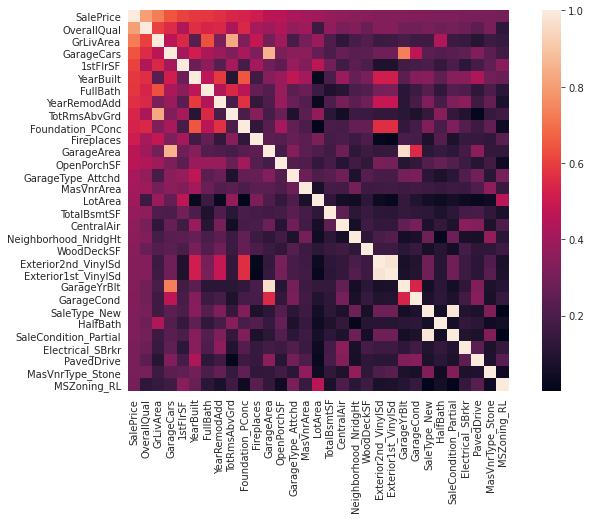

In [ ]:
corrmat_pf = abs(treino_pf.corr()) # calculando nossa matriz de correlação após nossa primeira filtragem

plt.figure(figsize=(12,7)) # configurando o tamanho da figura

sns.heatmap(corrmat_pf, cbar=True, square=True) # plottando nossa matriz

plt.show()

Vamos para a nossa segunda filtragem! Dessa vez vamos ver se reduzirmos para 15 variáveis, o mínimo coeficiente de correlação aumente.

In [ ]:
sf = 16 # vamos selecionar agora apenas 15 variáveis das previamente selecionadas (segunda filtragem)

cols_sf = corrmat_total.nlargest(sf, 'SalePrice').index.tolist() # fazendo a seleção

treino_sf = treino_final[cols_sf] # reduzindo nosso dataset de treino

Conferindo o procedimento e quais variáveis foram selecionadas. 

In [ ]:
print(treino_sf.shape, cols_sf)

(1460, 16) ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'GarageType_Attchd', 'MasVnrArea', 'LotArea']


Com o número ainda mais reduzido, podemos ver se ainda precisamos filtrar nossas variáveis de entrada. Podemos incrementar um pouco mais nossa visualização e mostrar até os coeficientes em cada quadrado da matriz.

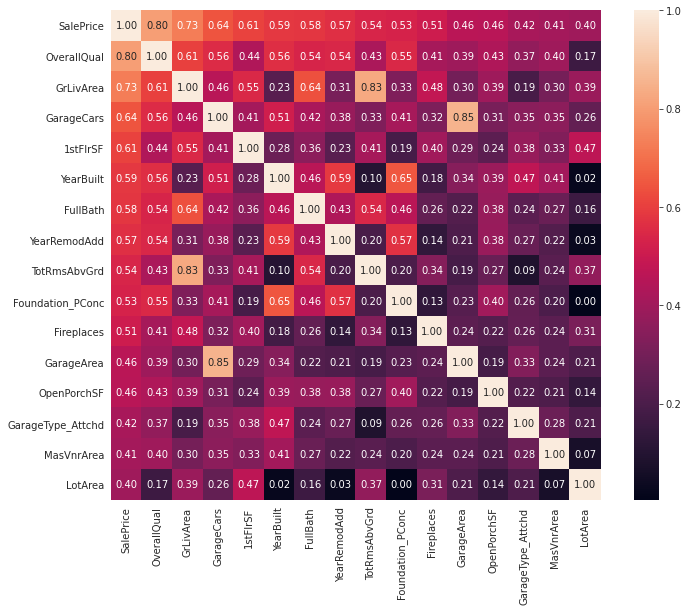

In [ ]:
corrmat_sf = abs(treino_sf.corr()) # calculando nossa matriz de correlação após nossa primeira filtragem

plt.figure(figsize=(12,9)) # configurando o tamanho da figura

sns.heatmap(corrmat_sf, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}) # plottando nossa matriz

plt.show()

Perfeito! Estamos chegando perto!! Agora, podemos usar uma tolerância mínima para o valor do coeficiente de correlação. Essa tolerância, para o método de filtragem, pode variar e normalmente é feita a base de testes. Vamos prosseguir com uma tolerância mínima de 0.5 e realizar nossa terceira filtragem.

In [ ]:
tol = 0.5 # escolhendo nossa tolerância mínima

cols_tf = corrmat_sf[corrmat_sf['SalePrice'] > 0.5].index.tolist() # selecionando as variáveis que satisfazem essa tolerância e fazendo a filtragem

treino_tf = treino_final[cols_tf]

Conferindo o procedimento e quais variáveis foram selecionadas.

In [ ]:
print(treino_tf.shape, cols_tf)

(1460, 11) ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Foundation_PConc', 'Fireplaces']


E vamos dar uma visualizada na nossa matriz após essa última filtragem.

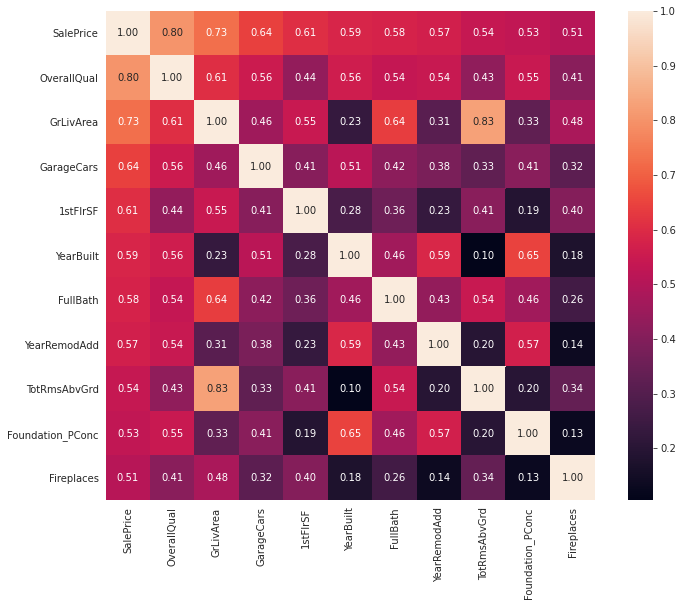

In [ ]:
corrmat_tf = abs(treino_tf.corr()) # calculando nossa matriz de correlação após nossa primeira filtragem

plt.figure(figsize=(12,9)) # configurando o tamanho da figura

sns.heatmap(corrmat_tf, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}) # plottando nossa matriz

plt.show()

Para finalizar, vamos checar se nossas variáveis finais se correlacionam, ou seja, queremos evitar a colinearidade e/ou redundância de informação em nosso dataset de entrada.

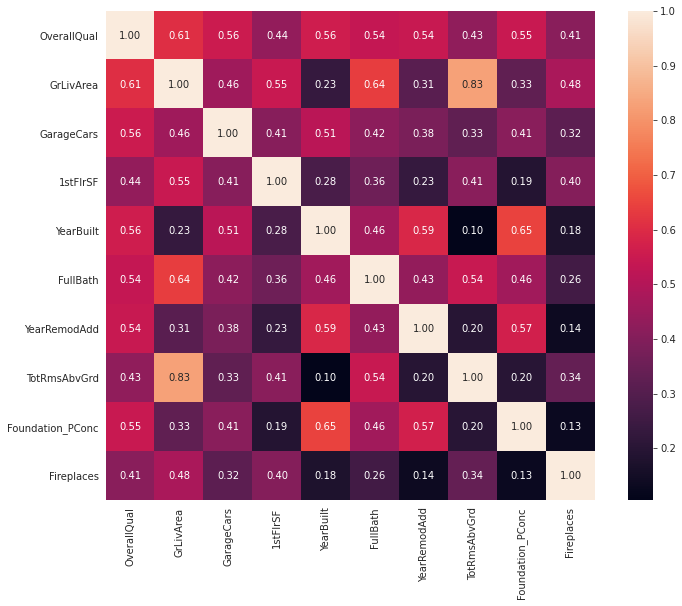

In [ ]:
corrmat_coli = abs(treino_tf.loc[:, treino_tf.columns != 'SalePrice'].corr()) # calculando os coefientes de correlação de nossas variáveis, mas sem o alvo

plt.figure(figsize=(12,9)) # configurando o tamanho da figura

sns.heatmap(corrmat_coli, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}) # plottando nossa matriz

plt.show()

Analisando o gráfico, vemos que as variáveis `GrLivArea` e `TotRmsAbvGrd` estão altamente correlacionadas, indicando que elas podem apresentar informação redundante. Sendo assim, podemos manter apenas uma delas em nossas variáveis usadas para construir nosso modelo. Iremos manter a `GrLivArea` pois ela tem um coeficiente de correlação maior que a `TotRmsAbvGrd` com nossa variável alvo.

Quanto as demais variáveis, algumas, apesar de também terem coeficientes de correlacção relativamente altos, podem ser mantidas já que não ultrapassam os 70%. Essa regra nem sempre vale, e como sendo o processo de filtragem um método bem subjetivo, cabe aqui também mais testes para averiguar.

In [ ]:
treino_tf = treino_tf.drop(columns=['TotRmsAbvGrd']) # removendo a variável TotRmsAbvGrd

Vamos verificar agora como ficou o nosso set final de variáveis para usarmos em nosso modelo.

In [ ]:
treino_tf.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,Fireplaces
0,2.676523,2.397895,8.370316,1.386294,7.801800,7.598399,1.386294,7.598900,1,1.098612
1,2.675606,2.397895,8.406708,1.386294,7.788212,7.599401,1.386294,7.599401,1,1.098612
2,2.663437,2.397895,8.196437,1.386294,7.513164,7.598900,1.386294,7.599401,1,0.693147
3,2.661931,2.302585,7.768533,1.386294,7.768533,7.605890,1.098612,7.606387,1,1.098612
4,2.658568,2.302585,7.945555,1.386294,7.458763,7.605392,1.386294,7.605890,1,0.693147


In [ ]:
print(treino_tf.shape)

(1460, 10)


Variáveis selecionadas e filtradas, podemos ir para a nosso fluxo de procedimentos de **ML**. 

## Fluxo de Procedimentos de Machine-Learning


### Divisão de Dataset

A primeira coisa que devemos fazer é dividir o nosso dataset em treino e validação (no nosso caso será o nosso teste também). O primeiro será usado para treinar o modelo e fazer com que seus parâmetros sejam otimizados. O segundo, nunca antes visto pelo modelo de **ML**, será usado para conseguirmos analisar nossas métricas e a performance de nosso algoritmo. A biblioteca **Sklearn** tem uma função específica para essa divisão de dataset e é a mais usada entre os praticantes de Data Science, a famosa `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split # importando a biblioteca

Y = treino_tf['SalePrice'] # pegando nossa variável alvo
X = treino_tf.loc[:, treino_tf.columns != 'SalePrice'] # pegando nossas variáveis selecionadas (sem a nossa variável incluída!)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0) # separando nosso dataset de treino pegando 70% de todo nosso dataset e 30% para o nosso dataset de teste

Vamos verificar como nossos datasets ficara.

In [ ]:
print('Variáveis de Entrada para Treino: ', x_train.shape, '\n', 'Variável Alvo de Treino: ', y_train.shape, '\n', 'Variáveis de Entrada para Teste: ', x_test.shape, '\n', 'Variável Alvo para Teste: ', y_test.shape)

Variáveis de Entrada para Treino:  (1022, 9) 
 Variável Alvo de Treino:  (1022,) 
 Variáveis de Entrada para Teste:  (438, 9) 
 Variável Alvo para Teste:  (438,)


### Definição de Modelo

Vamos aos nossos modelos! Uma outra etapa fundamental dos procedimentos de Data Science é a **Seleção do Modelo** que iremos usar. O melhor procedimento sempre é a definição clara do objetivo e da tarefa que desejamos realizar, uma extensa busca na literatura, e, por fim, testar os modelos e verificar os que apresentaram as melhores métricas. Para o exemplo aqui, vamos usar dois modelos para regressão linear:

1.   A **Regressão Linear** por **Mínimos Quadrados**: visa minimizar a soma dos quadrados do resíduo entre o o dado observado e o predito.
2.   A **Regressão de Ridge**: é uma regressão de mínimos quadrados com **regularização** usando normal **L2**. O parâmetro $aplha$ defini o grau de penalidade da regularização. Para $alpha = 0$ a regressão se torna identica a regressão por mínimos quadrados, e quanto maior for esse parâmetro, maior será a penalização. O valor padrão do parâmetro na biblioteca que iremos usar é $alpha=1$.

Vamos importar nossos modelos, disponíveis na biblioteca **Sklearn**, e começar os trabalhos!

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression # importando os modelos usando

lr = LinearRegression() # chamando o nosso modelo de regressão linear por mínimos quadrados

reg = Ridge(alpha = 100) # chamando o nosso modelo de regressão de Ridge com parâmetro alpha bem alto

reg1 = Ridge() # chamando o nosso modelo de regressão de Ridge com parâmetro alpha padrão igual a 1

"Treinando" o modelo (usando o método fit!)

In [ ]:
lr.fit(x_train, y_train); # treinando o modelo de mínimos quadrados
reg.fit(x_train, y_train); # treinando o modelo de Ridge com penalização maior
reg1.fit(x_train, y_train); # treinando o modelo de Ridge com penalização default

Perfeito! Agora vamos ver como esses modelos se comportam com nossos dados de teste.

In [ ]:
y_pred_lr = lr.predict(x_test) # predizendo usando o modelo de mínimos quadrados
y_pred_reg = reg.predict(x_test) # predizendo usando o modelo de Ridge com penalização maior
y_pred_reg1 = reg1.predict(x_test) # predizendo usando o modelo de Ridge com penalização default

Legal! Vamos olhar as métricas para podermos selecionar qual será o melhor modelo entre os que usamos. Para uma regressão, as métricas mais interessantes são o **R2-Score** e o **RMSE**. O **R2** nos dará a informação sobre a regressão linear, o quanto nossa reta gerada pelo treinamento do modelo consegue predizer nossos dados de teste. O **RMSE** nos dará informação mais relacionado a magnitude da acurácia, ou seja, qual seria a tolerância de nosso modelo.

Mais uma vez, vamos usar a biblioteca **Sklearn** para calcularmos nossas métricas.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score # importando as funções responsáveis pelo cálculo de nossas métricas

print('\n', 'Mínimos Quadrados:', '\n', 'RMSE: ', mean_squared_error(y_test, y_pred_lr, squared=False), '\n', 'R2-Score: ', r2_score(y_test, y_pred_lr))
print('\n', 'Regressão de Ridge com peso mais alto (alpha=100):', '\n', 'RMSE: ', mean_squared_error(y_test, y_pred_reg, squared=False), '\n', 'R2-Score: ', r2_score(y_test, y_pred_reg))
print('\n', 'Regressão de Ridge com peso padrão (alpha=1):', '\n', 'RMSE: ', mean_squared_error(y_test, y_pred_reg1, squared=False), '\n', 'R2-Score: ', r2_score(y_test, y_pred_reg1))


 Mínimos Quadrados: 
 RMSE:  0.012133810666321807 
 R2-Score:  0.8437817148231792

 Regressão de Ridge com peso mais alto (alpha=100): 
 RMSE:  0.015149613518113307 
 R2-Score:  0.7564766858265523

 Regressão de Ridge com peso padrão (alpha=1): 
 RMSE:  0.01273449791016124 
 R2-Score:  0.8279316115882794


Mas rapaz, não é que ficou bom usando uma simples Regressão Linear? E o mais interessante, o modelo mais simples foi que obteve melhor resultado.

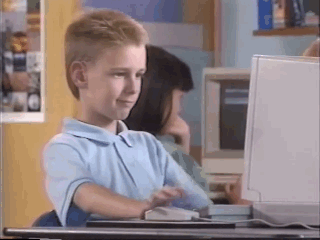

Isso aconteceu não só porque nosso tratamento de dados foi rigoroso, mas também porque nosso dataset estava muito bem controlado, portanto, possuíamos pouca quantidade de outliers, ruídos e dados errôneos. Essa situação fez com que não fosse necessária regularização e ela passou a atuar como um fator penalizante em nossas métricas e não como um fator de melhora.

Só para desencargo de consciência, o [placar](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard) desse desafio que nós fizemos é atualizado até hoje! O líder tem o seu **RMSE** $= 0.00044$. Então, mãos a obra!! Teste mais parâmetros, novos modelos, novas abordagens, novas técnicas de seleção de variável e melhore essas métricas!!! 